In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt

In [6]:
df=pd.read_csv('exchange_rate.csv')

In [8]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [10]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


<Axes: >

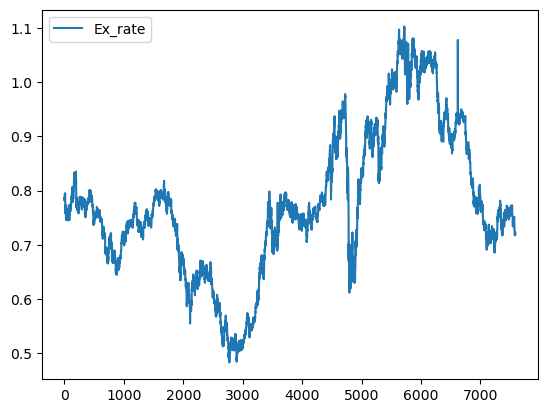

In [12]:
df.plot()

In [14]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [16]:
df.shape

(7588, 2)

In [18]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [20]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [24]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
# handle missing values

In [30]:
# Handle missing values with mean
df['Ex_rate'].fillna(df['Ex_rate'].mean(), inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M') # Specify the format as day-month-year hour:minute

In [32]:
result= seasonal_decompose(df['Ex_rate'],model='multiplicative',period=365)

<Axes: >

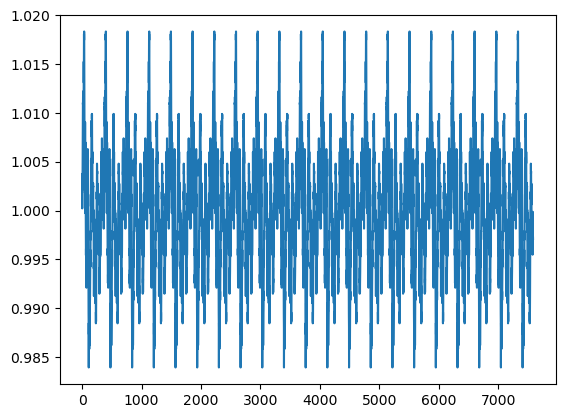

In [34]:
result.seasonal.plot()

<Axes: >

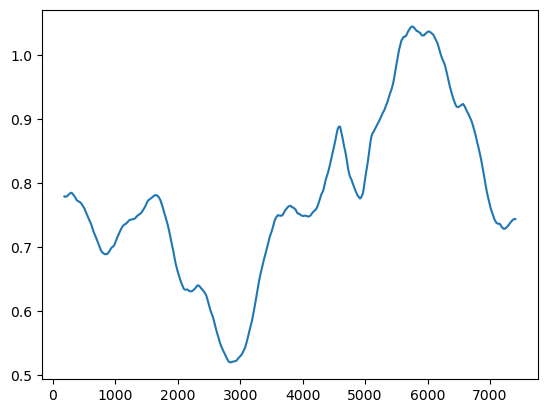

In [35]:
result.trend.plot()

<Axes: >

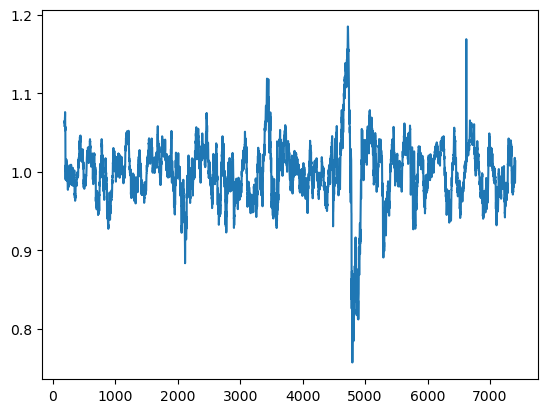

In [38]:
result.resid.plot()

In [41]:
##: Model Building - ARIMA

In [40]:
## To estimate the initial parameters (p, d, q) for the ARIMA model, we will utilize ACF and PACF plots.

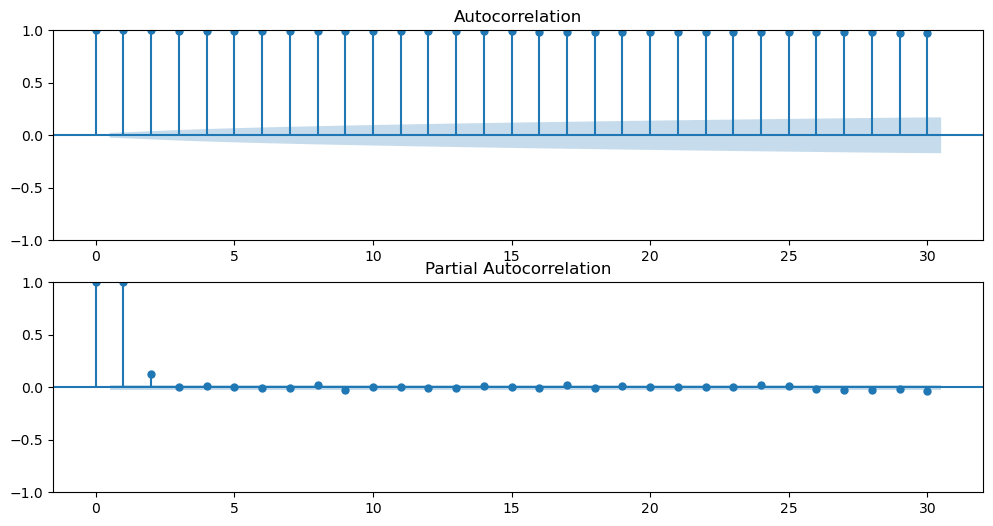

In [44]:
# Plot ACF and PACF
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
sm.graphics.tsa.plot_acf(df['Ex_rate'], lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['Ex_rate'], lags=30, ax=ax[1])
plt.show()

In [46]:
model = sm.tsa.ARIMA(df['Ex_rate'], order=(1, 1, 1))

In [48]:
model

In [56]:
results=model.fit()
results

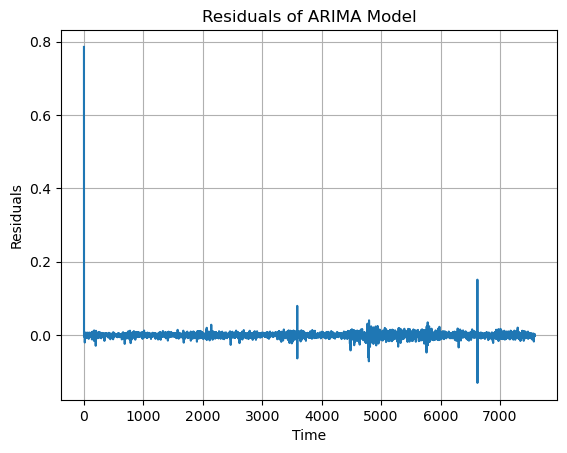

In [57]:
residuals = results.resid
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals of ARIMA Model')
plt.grid()

 ## Forecast future values

In [62]:
forecast = results.forecast(steps=30)
forecast

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

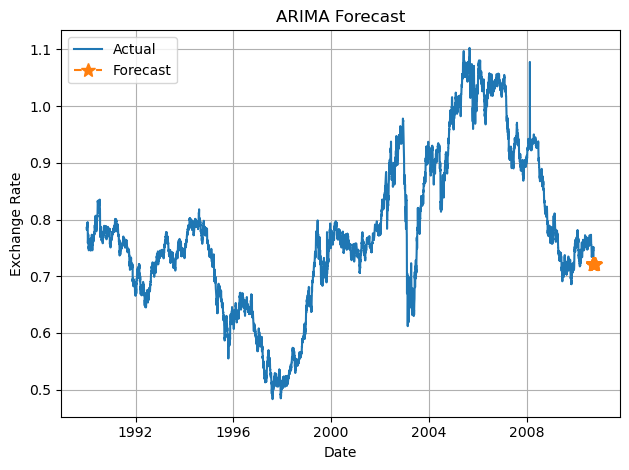

In [64]:
# Plot forecasted values
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(df['date'][-30:], forecast, label='Forecast',linestyle='--',marker='*',markersize=10)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

## Exponential smoothing

In [67]:
from statsmodels.tsa.holtwinters import Holt

In [71]:
param_grid = {'smoothing_level': [0.1, 0.3, 0.5], 'smoothing_trend': [0.1, 0.3, 0.5]}
param_grid

{'smoothing_level': [0.1, 0.3, 0.5], 'smoothing_trend': [0.1, 0.3, 0.5]}

In [73]:
best_params = None
best_score = float('inf')
for smoothing_level in param_grid['smoothing_level']:
    for smoothing_trend in param_grid['smoothing_trend']:
        model = Holt(df['Ex_rate'], exponential=True)
        # Used smoothing_level and smoothing_trend instead of alpha and beta
        model_fit = model.fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend)
        score = model_fit.aic
        if score < best_score:
            best_score = score
            best_params = (smoothing_level, smoothing_trend)

print('Optimal parameters:', best_params) # Perform grid search

Optimal parameters: (0.5, 0.1)


In [77]:
model = Holt(df['Ex_rate'], exponential=True)
model

In [81]:
model_fit = model.fit(smoothing_level=best_params[0], smoothing_trend=best_params[1])
model_fit

In [85]:
forecast = model_fit.forecast(steps=30)
forecast

7588    0.719854
7589    0.719336
7590    0.718819
7591    0.718302
7592    0.717786
7593    0.717270
7594    0.716754
7595    0.716239
7596    0.715724
7597    0.715209
7598    0.714695
7599    0.714181
7600    0.713667
7601    0.713154
7602    0.712642
7603    0.712129
7604    0.711617
7605    0.711106
7606    0.710594
7607    0.710083
7608    0.709573
7609    0.709063
7610    0.708553
7611    0.708043
7612    0.707534
7613    0.707026
7614    0.706517
7615    0.706009
7616    0.705502
7617    0.704994
dtype: float64

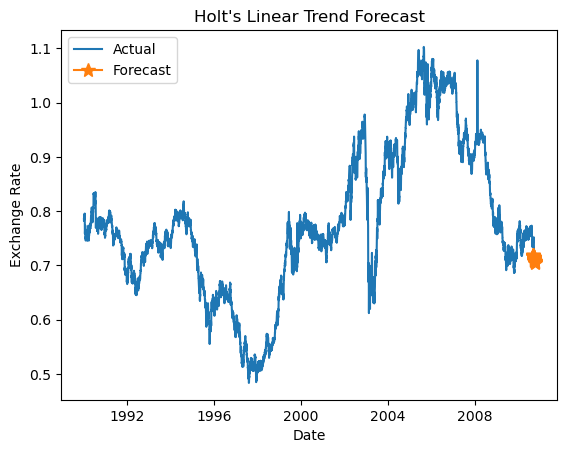

In [87]:
# Plot forecasted values
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(df['date'][-30:], forecast, label='Forecast',markersize=10,marker='*',linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Holt\'s Linear Trend Forecast')
plt.legend()
plt.show()

## Evaluation and Comparison

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [106]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [108]:
arima_forecast = results.forecast(steps=30)

In [110]:
arima_forecast

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [112]:
arima_mae = mean_absolute_error(df['Ex_rate'][-30:], arima_forecast)

In [114]:
arima_mae

0.012724006489318252

In [116]:
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], arima_forecast))

In [118]:
arima_rmse

0.016982710912774826

In [120]:
arima_mape = mean_absolute_percentage_error(df['Ex_rate'][-30:], arima_forecast)

In [122]:
arima_mape

1.7119209757097404

In [124]:
holt_forecast = model_fit.forecast(steps=30) # Compute error metrics for Holt's Linear Trend model

In [126]:
holt_forecast

7588    0.719854
7589    0.719336
7590    0.718819
7591    0.718302
7592    0.717786
7593    0.717270
7594    0.716754
7595    0.716239
7596    0.715724
7597    0.715209
7598    0.714695
7599    0.714181
7600    0.713667
7601    0.713154
7602    0.712642
7603    0.712129
7604    0.711617
7605    0.711106
7606    0.710594
7607    0.710083
7608    0.709573
7609    0.709063
7610    0.708553
7611    0.708043
7612    0.707534
7613    0.707026
7614    0.706517
7615    0.706009
7616    0.705502
7617    0.704994
dtype: float64

In [128]:
holt_mae = mean_absolute_error(df['Ex_rate'][-30:], holt_forecast)

In [130]:
holt_mae

0.02033885085956986

In [132]:
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], holt_forecast))

In [134]:
holt_rmse

0.021993147748210314

In [136]:
holt_mape = mean_absolute_percentage_error(df['Ex_rate'][-30:], holt_forecast)

In [138]:
holt_mape

2.7582255339119266

In [140]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [142]:
arima_mape = mean_absolute_percentage_error(df['Ex_rate'][-30:], arima_forecast)# Calculate MAPE for ARIMA model

In [144]:
arima_mape

1.7119209757097404

In [150]:
holt_mape = mean_absolute_percentage_error(df['Ex_rate'][-30:], holt_forecast) # Calculate MAPE for Holt's Linear Trend model

In [152]:
holt_mape

2.7582255339119266

### Model Comparison

# ARIMA Model
 Advantages: Handles non-stationarity and seasonality

 Limitations: Computationally expensive, requires careful parameter selection

 Performance: MAE=0.01, RMSE=0.016, MAPE=1.71%

# Holt's Linear Trend Model

 Advantages: Simple, computationally efficient

Limitations: Assumes linear trend, no seasonality

Performance: MAE=0.020, RMSE=0.021, MAPE=2.75%
